In [1]:
from platform import python_version

print(python_version())

3.8.8


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Cleaning

## Step 1: Importing the dataset

In [3]:
stocks_df = pd.read_csv('Stocks.csv')

In [4]:
stocks_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [5]:
stocks_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [6]:
stocks_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


## Step 2: Exploring Data

In [7]:
stocks_df.shape

(1009, 7)

In [8]:
stocks_df.index

RangeIndex(start=0, stop=1009, step=1)

In [9]:
stocks_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [28]:
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
#print(stocks_df.Date.max())
#print(stocks_df.Date.min())
print(f'Total days in dataset = {(stocks_df.Date.max()-stocks_df.Date.min()).days} days')

Total days in dataset = 1460 days


In [11]:
stocks_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


## Step 3: Handling Missing Values

In [12]:
# No missing values
stocks_df.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [13]:
stocks_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Step 4: Handling Duplicates

In [14]:
stocks_df.duplicated().sum()

0

In [15]:
stocks_df[stocks_df.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


In [16]:
stocks_df.drop_duplicates(inplace=True)
stocks_df.duplicated().sum()

0

## Step 5: Checking column data types

In [17]:
stocks_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [18]:
stocks_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


## Step 6: Handling outliers

<AxesSubplot:>

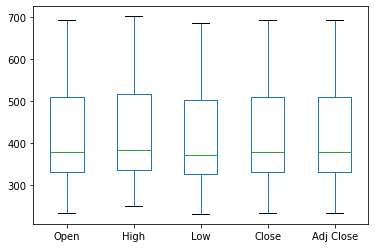

In [19]:
stocks_df[['Open','High','Low','Close','Adj Close']].plot(kind='box')

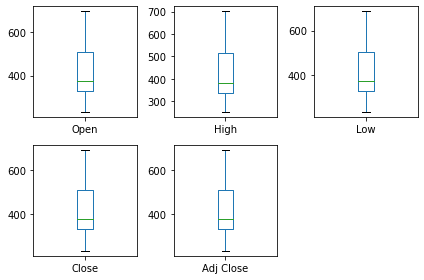

In [20]:
plt.subplot(2,3,1)
stocks_df['Open'].plot(kind='box') 

plt.subplot(2,3,2)
stocks_df['High'].plot(kind='box')

plt.subplot(2,3,3)
stocks_df['Low'].plot(kind='box') 

plt.subplot(2,3,4)
stocks_df['Close'].plot(kind='box')

plt.subplot(2,3,5)
stocks_df['Adj Close'].plot(kind='box') 

plt.tight_layout()

In [21]:
stocks_df[['Open','High','Low','Close','Adj Close']].describe()

,Open,High,Low,Close,Adj Close
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,419.059673,425.320703,412.374044,419.000733,419.000733
std,108.537532,109.262960,107.555867,108.289999,108.289999
min,233.919998,250.649994,231.229996,233.880005,233.880005
25%,331.489990,336.299988,326.000000,331.619995,331.619995
50%,377.769989,383.010010,370.880005,378.670013,378.670013
75%,509.130005,515.630005,502.529999,509.079987,509.079987
max,692.349976,700.989990,686.090027,691.690002,691.690002


In [23]:
def find_outlier_limits(col_name):
    Q1,Q3=stocks_df[col_name].quantile([.25,.75])
    IQR=Q3-Q1
    low=Q1-(1.5* IQR)
    high=Q3+(1.5* IQR)
    return (high,low)

high_hp,low_hp=find_outlier_limits('High')
print('High: ','upper limit: ',high_hp,' lower limit: ',low_hp)

stocks_df.loc[stocks_df['High']>high_hp,'High']=high_hp
stocks_df.loc[stocks_df['High']<low_hp,'High']=low_hp


High:  upper limit:  784.6250305  lower limit:  67.30496249999999


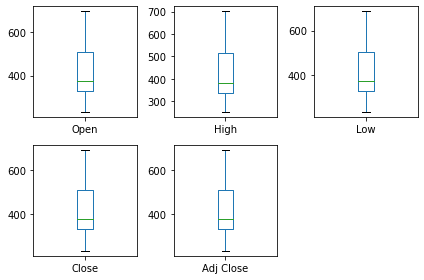

In [24]:
plt.subplot(2,3,1)
stocks_df['Open'].plot(kind='box') 

plt.subplot(2,3,2)
stocks_df['High'].plot(kind='box')

plt.subplot(2,3,3)
stocks_df['Low'].plot(kind='box') 

plt.subplot(2,3,4)
stocks_df['Close'].plot(kind='box')

plt.subplot(2,3,5)
stocks_df['Adj Close'].plot(kind='box') 

plt.tight_layout()

## Data Understanding

In [25]:
stocks_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [29]:
# Close is the final price
price_plot = stocks_df[['Date','Close']]
price_plot

,Date,Close
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001
...,...,...
1004,2022-01-31,427.140015
1005,2022-02-01,457.130005
1006,2022-02-02,429.480011
1007,2022-02-03,405.600006


<AxesSubplot:xlabel='Date'>

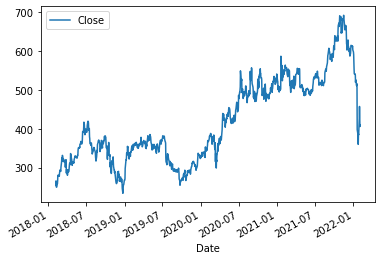

In [34]:
price_plot.plot(x='Date',y='Close',kind='line')


In [35]:
print(stocks_df.Close.max())

691.690002


In [36]:
print(stocks_df.Close.min())

233.880005


In [41]:
correlation_df=stocks_df[['Open','High','Low','Close','Adj Close','Volume']].corr()
correlation_df

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


<AxesSubplot:>

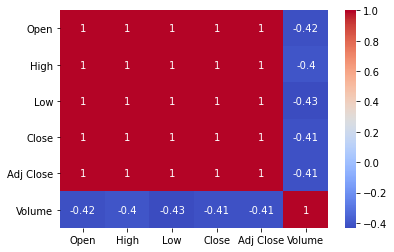

In [42]:
import seaborn as sns
sns.heatmap(correlation_df, cmap="coolwarm", annot=True)

# ML Model Building

In [37]:
stocks_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [87]:
# Need to preserve date column
x = stocks_df.iloc[:, [1,2,3,6]]
#x = stocks_df.iloc[:, [0,1,2,3,5,6]]
#x = np.array(stocks_df.index).reshape(-1,1)
y = stocks_df.iloc[:, 4]
print(x)
print(y)

            Open        High         Low    Volume
0     262.000000  267.899994  250.029999  11896100
1     247.699997  266.700012  245.000000  12595800
2     266.579987  272.450012  264.329987   8981500
3     267.079987  267.619995  250.000000   9306700
4     253.850006  255.800003  236.110001  16906900
...          ...         ...         ...       ...
1004  401.970001  427.700012  398.200012  20047500
1005  432.959991  458.480011  425.540009  22542300
1006  448.250000  451.980011  426.480011  14346000
1007  421.440002  429.260010  404.279999   9905200
1008  407.309998  412.769989  396.640015   7782400

[1009 rows x 4 columns]
0       254.259995
1       265.720001
2       264.559998
3       250.100006
4       249.470001
           ...    
1004    427.140015
1005    457.130005
1006    429.480011
1007    405.600006
1008    410.170013
Name: Close, Length: 1009, dtype: float64


In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [89]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit_transform(X_train)
scale.transform(X_test);

## Training the model

In [90]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [91]:
reg.fit(X_train, y_train)

LinearRegression()

In [92]:
m = reg.coef_
c = reg.intercept_
m,c

(array([-6.08525352e-01,  7.52637059e-01,  8.57461003e-01,  9.16527847e-08]),
 -0.4790625251752658)

In [93]:
y_pred_train = reg.predict(X_train)

In [94]:
y_pred_test = reg.predict(X_test)

In [95]:
from sklearn.metrics import r2_score
r2_S = r2_score(y_train, y_pred_train)
r2_S

0.9987695016679285

In [96]:
from sklearn.metrics import r2_score
r2_S = r2_score(y_test, y_pred_test)
r2_S

0.9984917455237636

In [97]:
#Predicts closing price given all other price details
stock={ 'Open':[260],'High':[270],'Low':[240],'Volume':[6000000] }
print(reg.predict(pd.DataFrame(stock)))

[250.85690903]
